# Notebook to examine rag evaluation results

In [196]:
# Imports
import sys
import pandas as pd
import numpy as np
sys.path.append("../dev/")
sys.path.append("../src/")
import time

from csv_helpers import get_csv_files_from_dir

In [213]:
# Look at the eval results files, especially the mean correctness
import dask.dataframe as dd
# Get eval results file names
paramter = "pool"
evaluator = "llm-judge"
eval_results_dir = f"../parallel_100_rows_eval/miniBiosQA/{evaluator}"
eval_results_file_names = get_csv_files_from_dir(eval_results_dir)

# Loop over all eval results files
# Get column names which are the config paramters and the mean correctness or some other metric
columns = [
    "quExp",
    "rerank",
    "cExp",
    "backRev",
    "numRefLim",
    "metric",
    "evaluator",
] + ["MeanCorrectness"]
results_df = pd.DataFrame(columns=columns)
 
for filename in eval_results_file_names[:]:  # Iterate over all eval results files
    # Filter files: Only look at files with quExp1_rerank1_cExp*_backRevFalse_numRef4
    # first_file = f"{eval_results_dir}/{eval_results_file_names[1]}"  # Slice for dev
    file = eval_results_dir + "/" + filename  # Slice for dev
   
    # Read eval results from CSV
    eval_results_df = dd.read_csv(file)
    # Show the first 5 rows
    
    correctness_values = eval_results_df["Correct"].dropna()
    correctness_values = correctness_values.compute(engine="python")
   
    #print(f"Correctness values: {correctness_values}")
   
    mean = sum(correctness_values) / len(correctness_values)
    
    # Project the values to be between 0 and 1
    mean_scaled = (mean - min(correctness_values)) / (max(correctness_values) - min(correctness_values))

    #print(f"Mean correctness: {mean}")
    # Append the correctness values to the list
    config = filename.split("_")
    #print(f" Config: {config}")
    results_df = pd.concat(
        [
            results_df,
            pd.DataFrame(
                [
                    {
                        "quExp": config[0],
                        "rerank": config[1],
                        "cExp": config[2],
                        "backRev": config[3],
                        "numRefLim": config[4],
                        "metric": config[-2],
                        "evaluator": config[-1],
                        "MeanCorrectness": mean_scaled,
                    }
                ]
            ),
        ]
    )

# Filter one evaluation method
# results_df = results_df[results_df["backRev"] == "backRevFalse"]
# results_df = results_df[results_df["rerank"] == "rerankFalse"]
#results_df = results_df[results_df["cExp"] == "cExpTrue"]
# results_df = results_df[results_df["quExp"] == "quExp1"]
#results_df = results_df[results_df["rerank"] == "rerankTrue"]
#results_df = results_df[results_df["numRefLim"] == "numRefLim1"]
# drop all rows where metric is all

# results_df = results_df[results_df["metric"] != "all"]
results_df = results_df[results_df["numRefLim"] != ("numRefLim5")]
results_df = results_df[results_df["numRefLim"] != ("numRefLim4")]
results_df = results_df[results_df["numRefLim"] != ("numRefLim3")]
results_df.sort_values(by="MeanCorrectness", ascending=False)

/tmp/ipykernel_666520/3934689319.py:45: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat(


,quExp,rerank,cExp,backRev,numRefLim,metric,evaluator,MeanCorrectness
0,quExp1,rerankrrf,cExpTrue,backRevFalse,numRefLim2,all,llm-judge.csv,0.973333
0,quExp3,rerankrrf,cExpTrue,backRevFalse,numRefLim2,all,llm-judge.csv,0.965000
0,quExp3,rerankTrue,cExpTrue,backRevFalse,numRefLim1,all,llm-judge.csv,0.965000
0,quExp1,rerankrrf,cExpTrue,backRevFalse,numRefLim1,all,llm-judge.csv,0.960000
0,quExp1,rerankFalse,cExpTrue,backRevFalse,numRefLim1,all,llm-judge.csv,0.950000
0,quExp3,rerankTrue,cExpFalse,backRevFalse,numRefLim1,all,llm-judge.csv,0.950000
0,quExp2,rerankrrf,cExpTrue,backRevFalse,numRefLim2,all,llm-judge.csv,0.950000
0,quExp1,rerankTrue,cExpTrue,backRevFalse,numRefLim1,all,llm-judge.csv,0.950000
0,quExp1,rerankFalse,cExpFalse,backRevFalse,numRefLim1,all,llm-judge.csv,0.940000
0,quExp1,rerankFalse,cExpTrue,backRevFalse,numRefLim2,all,llm-judge.csv,0.930000


/tmp/ipykernel_666520/1541681427.py:45: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat(


<Axes: xlabel='MeanCorrectness', ylabel='Count'>

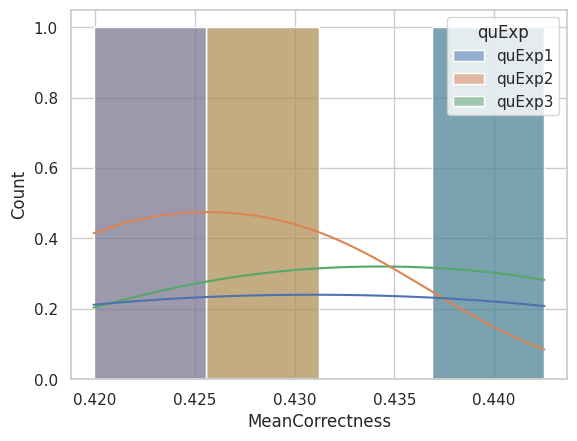

In [217]:
# Look at the eval results files, especially the mean correctness
import dask.dataframe as dd
# Get eval results file names
parameter = "quExp"
evaluator = "ROUGE-1"
eval_results_dir = f"../parallel_100_rows_eval/miniBiosQA/{parameter}/{evaluator}"
eval_results_file_names = get_csv_files_from_dir(eval_results_dir)

# Loop over all eval results files
# Get column names which are the config paramters and the mean correctness or some other metric
columns = [
    "quExp",
    "rerank",
    "cExp",
    "backRev",
    "numRefLim",
    "metric",
    "evaluator",
] + ["MeanCorrectness"]
results_df = pd.DataFrame(columns=columns)

for filename in eval_results_file_names[:]:  # Iterate over all eval results files
    # Filter files: Only look at files with quExp1_rerank1_cExp*_backRevFalse_numRef4
    # first_file = f"{eval_results_dir}/{eval_results_file_names[1]}"  # Slice for dev
    file = eval_results_dir + "/" + filename  # Slice for dev
   
    # Read eval results from CSV
    eval_results_df = dd.read_csv(file)
    # Show the first 5 rows
    
    correctness_values = eval_results_df["Correct"].dropna()
    correctness_values = correctness_values.compute(engine="python")
   
    #print(f"Correctness values: {correctness_values}")
   
    mean = sum(correctness_values) / len(correctness_values)
    
    # Project the values to be between 0 and 1
    mean_scaled = (mean - min(correctness_values)) / (max(correctness_values) - min(correctness_values))

    #print(f"Mean correctness: {mean}")
    # Append the correctness values to the list
    config = filename.split("_")
    #print(f" Config: {config}")
    results_df = pd.concat(
        [
            results_df,
            pd.DataFrame(
                [
                    {
                        "quExp": config[0],
                        "rerank": config[1],
                        "cExp": config[2],
                        "backRev": config[3],
                        "numRefLim": config[4],
                        "metric": config[-2],
                        "evaluator": config[-1],
                        "MeanCorrectness": mean_scaled,
                    }
                ]
            ),
        ]
    )

# Filter one evaluation method
# results_df = results_df[results_df["backRev"] == "backRevFalse"]
# results_df = results_df[results_df["rerank"] == "rerankFalse"]
#results_df = results_df[results_df["cExp"] == "cExpTrue"]
# results_df = results_df[results_df["quExp"] == "quExp1"]
#results_df = results_df[results_df["rerank"] == "rerankTrue"]
#results_df = results_df[results_df["numRefLim"] == "numRefLim1"]

results_df.sort_values(by="MeanCorrectness", ascending=False).head(20)
import seaborn as sns
sns.histplot(data=results_df, x="MeanCorrectness", hue="quExp", kde=True)

# results_df.head(10)

In [232]:
# Look at the eval results files, especially the mean correctness
import dask.dataframe as dd
# Get eval results file names
parameter = "numRefLim"
evaluator = "llm-judge"
eval_results_dir = f"../parallel_100_rows_eval/miniBiosQA/{evaluator}"
eval_results_file_names = get_csv_files_from_dir(eval_results_dir)

# Loop over all eval results files
# Get column names which are the config paramters and the mean correctness or some other metric
columns = [
    "quExp",
    "rerank",
    "cExp",
    "backRev",
    "numRefLim",
    "metric",
    "evaluator",
] + ["MeanCorrectness"]
results_df = pd.DataFrame(columns=columns)

for filename in eval_results_file_names[:]:  # Iterate over all eval results files
    # Filter files: Only look at files with quExp1_rerank1_cExp*_backRevFalse_numRef4
    # first_file = f"{eval_results_dir}/{eval_results_file_names[1]}"  # Slice for dev
    file = eval_results_dir + "/" + filename  # Slice for dev
   
    # Read eval results from CSV
    eval_results_df = dd.read_csv(file)
    # Show the first 5 rows
    
    correctness_values = eval_results_df["Correct"].dropna()
    correctness_values = correctness_values.compute(engine="python")
   
    #print(f"Correctness values: {correctness_values}")
   
    mean = sum(correctness_values) / len(correctness_values)
    
    # Project the values to be between 0 and 1
    mean_scaled = (mean - min(correctness_values)) / (max(correctness_values) - min(correctness_values))

    #print(f"Mean correctness: {mean}")
    # Append the correctness values to the list
    config = filename.split("_")
    #print(f" Config: {config}")
    results_df = pd.concat(
        [
            results_df,
            pd.DataFrame(
                [
                    {
                        "quExp": config[0],
                        "rerank": config[1],
                        "cExp": config[2],
                        "backRev": config[3],
                        "numRefLim": config[4],
                        "metric": config[-2],
                        "evaluator": config[-1],
                        "MeanCorrectness": mean_scaled,
                    }
                ]
            ),
        ]
    )


# Filter one evaluation method
# results_df = results_df[results_df["backRev"] == "backRevFalse"]
# results_df = results_df[results_df["rerank"] == "rerankFalse"]
#results_df = results_df[results_df["cExp"] == "cExpTrue"]
# results_df = results_df[results_df["quExp"] == "quExp1"]
#results_df = results_df[results_df["rerank"] == "rerankTrue"]
#results_df = results_df[results_df["numRefLim"] == "numRefLim1"]
results_df.sort_values(by="MeanCorrectness", ascending=False)
# results_df.head(10)

/tmp/ipykernel_666520/3787457330.py:45: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat(


,quExp,rerank,cExp,backRev,numRefLim,metric,evaluator,MeanCorrectness
0,quExp3,rerankTrue,cExpTrue,backRevFalse,numRefLim4,all,llm-judge.csv,0.980000
0,quExp1,rerankTrue,cExpTrue,backRevFalse,numRefLim4,all,llm-judge.csv,0.975000
0,quExp1,rerankrrf,cExpTrue,backRevFalse,numRefLim3,all,llm-judge.csv,0.973333
0,quExp1,rerankrrf,cExpTrue,backRevFalse,numRefLim2,all,llm-judge.csv,0.973333
0,quExp2,rerankrrf,cExpTrue,backRevFalse,numRefLim3,all,llm-judge.csv,0.973333
0,quExp1,rerankFalse,cExpFalse,backRevFalse,numRefLim3,all,llm-judge.csv,0.966667
0,quExp3,rerankrrf,cExpTrue,backRevFalse,numRefLim2,all,llm-judge.csv,0.965000
0,quExp3,rerankrrf,cExpTrue,backRevFalse,numRefLim4,all,llm-judge.csv,0.965000
0,quExp3,rerankTrue,cExpTrue,backRevFalse,numRefLim1,all,llm-judge.csv,0.965000
0,quExp2,rerankrrf,cExpTrue,backRevFalse,numRefLim4,all,llm-judge.csv,0.960000


/home/simon/master_project/software/venv_koenigsi/lib/python3.10/site-packages/scipy/stats/_stats_py.py:4102: DegenerateDataWarning: at least one input has length 0
  if _f_oneway_is_too_small(samples):


ANOVA result for 'rerank': F-statistic = 8.449105773792233, p-value = 0.0005281443266540203
ANOVA result for 'context expansion': F-statistic = 6.077200471075236, p-value = 0.016185908455093788
ANOVA result for 'question expansion': F-statistic = 7.493573188959692, p-value = 0.001145340917002229
ANOVA result for 'numRefLim': F-statistic = 1.0040375226814584, p-value = 0.3965635369344865
ANOVA result for 'backRev': F-statistic = nan, p-value = nan


<Axes: xlabel='MeanCorrectness', ylabel='Count'>

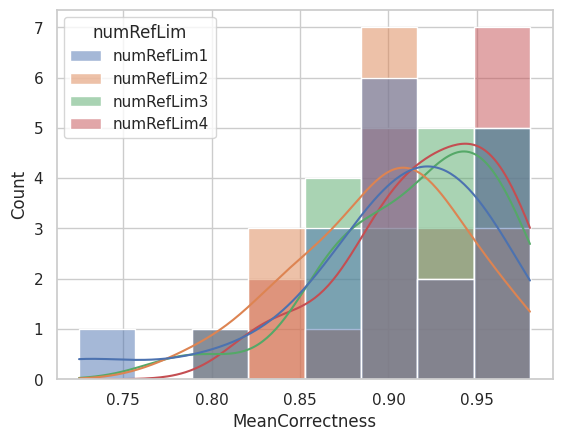

In [233]:
# Make Anova analysis
import pandas as pd
from scipy import stats

df = results_df

# One-way ANOVA: Test if the means of 'x' differ across categories in 'a'
anova_result_rerank = stats.f_oneway(df[df['rerank'] == 'rerankTrue']['MeanCorrectness'], df[df['rerank'] == 'rerankrrf']['MeanCorrectness'], df[df['rerank'] == 'rerankFalse']['MeanCorrectness'])
anova_result_cExp = stats.f_oneway(df[df['cExp'] == 'cExpTrue']['MeanCorrectness'], df[df['cExp'] == 'cExpFalse']['MeanCorrectness'])
anova_result_quExp = stats.f_oneway(df[df['quExp'] == 'quExp1']['MeanCorrectness'], df[df['quExp'] == 'quExp2']['MeanCorrectness'], df[df['quExp'] == 'quExp3']['MeanCorrectness'])
anova_result_numRefLim = stats.f_oneway(df[df['numRefLim'] == 'numRefLim1']['MeanCorrectness'],
                                        df[df['numRefLim'] == 'numRefLim2']['MeanCorrectness'], 
                                        df[df['numRefLim'] == 'numRefLim3']['MeanCorrectness'], 
                                        df[df['numRefLim'] == 'numRefLim4']['MeanCorrectness'],
                                       )
anova_result_backRev = stats.f_oneway(df[df['backRev'] == 'backRevTrue']['MeanCorrectness'], df[df['backRev'] == 'backRevFalse']['MeanCorrectness'])
print(f"ANOVA result for 'rerank': F-statistic = {anova_result_rerank.statistic}, p-value = {anova_result_rerank.pvalue}")
print(f"ANOVA result for 'context expansion': F-statistic = {anova_result_cExp.statistic}, p-value = {anova_result_cExp.pvalue}")
print(f"ANOVA result for 'question expansion': F-statistic = {anova_result_quExp.statistic}, p-value = {anova_result_quExp.pvalue}")
print(f"ANOVA result for 'numRefLim': F-statistic = {anova_result_numRefLim.statistic}, p-value = {anova_result_numRefLim.pvalue}")
print(f"ANOVA result for 'backRev': F-statistic = {anova_result_backRev.statistic}, p-value = {anova_result_backRev.pvalue}")



import seaborn as sns
import matplotlib.pyplot as plt
# Make plot of the mean correctness
sns.set_theme(style="whitegrid")
sns.set_context("paper")
sns.set_context("talk")
sns.set_context("notebook")

# Look at distribution of correctness values
#sns.histplot(data=results_df, x="MeanCorrectness", hue="cExp", kde=True)
#sns.histplot(data=results_df, x="MeanCorrectness", hue="rerank", kde=True)
#sns.histplot(data=results_df, x="MeanCorrectness", hue="quExp", kde=True)
sns.histplot(data=results_df, x="MeanCorrectness", hue="numRefLim", kde=True)
# sns.histplot(data=results_df, x="MeanCorrectness", hue="backRev", kde=True)


#plt.ylim(0.9,1)


quExp1_rerankFalse_cExpFalse_backRevFalse_numRefLim5_correctness_ROUGE-1.csv
quExp1
quExp2_rerankFalse_cExpFalse_backRevFalse_numRefLim5_correctness_ROUGE-1.csv
quExp2
quExp3_rerankFalse_cExpFalse_backRevFalse_numRefLim5_correctness_ROUGE-1.csv
quExp3


<Axes: ylabel='Count'>

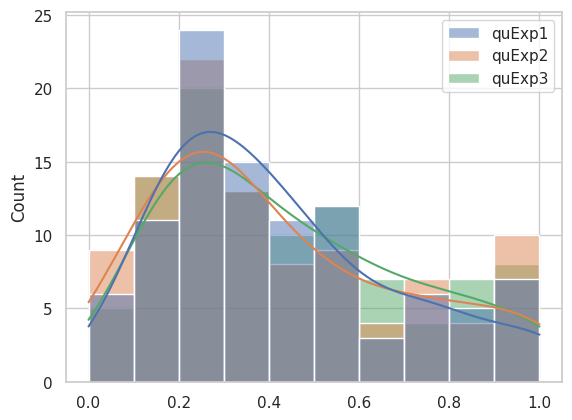

In [178]:
# Plot correctness in histplot of multiple cofingurations
import dask.dataframe as dd
# Get eval results file names
metric = "quExp"
evaluator = "ROUGE-1"
eval_results_dir = f"../parallel_100_rows_eval/miniBiosQA/{metric}/{evaluator}"
eval_results_file_names = get_csv_files_from_dir(eval_results_dir)

# Loop over all eval results files
# Get column names which are the config paramters and the mean correctness or some other metric
columns = [
    "quExp",
    "rerank",
    "cExp",
    "backRev",
    "numRefLim",
    "metric",
    "evaluator",
] + ["MeanCorrectness"]
results_df = pd.DataFrame(columns=columns)
import seaborn as sns
import matplotlib.pyplot as plt
# Make plot of the mean correctness
sns.set_theme(style="whitegrid")
sns.set_context("paper")
sns.set_context("talk")
sns.set_context("notebook")
series_list = []
for filename in eval_results_file_names[:]:  # Iterate over all eval results files
    # Filter files: Only look at files with quExp1_rerank1_cExp*_backRevFalse_numRef4
    # first_file = f"{eval_results_dir}/{eval_results_file_names[1]}"  # Slice for dev
    file = eval_results_dir + "/" + filename  # Slice for dev
   
    # Read eval results from CSV
    eval_results_df = dd.read_csv(file)
    # Show the first 5 rows

    correctness_values = eval_results_df["Correct"].dropna()
    correctness_values = correctness_values.compute(engine="python")
    print(filename)
    param = filename.split("_")[0]
    print(param)
    series_list.append(pd.Series(correctness_values, name=param))

correctness_values = pd.concat(series_list, axis=1)
# Plot the correctness values
sns.histplot(data=correctness_values, kde=True)
#sns.histplot(data=correctness_values, kde=True,label=param)


In [24]:
# Look at results from two 2 files
# Get eval results file names
eval_results_dir = "../eval_results/LLMs/miniWiki"
eval_results_file_names = get_csv_files_from_dir(eval_results_dir)

simple_config_file = eval_results_dir + "/" + eval_results_file_names[1]
print(f" simple config: {simple_config_file}")

simple_config_df = pd.read_csv(simple_config_file)
simple_config_df.head(10)

#complex_config_df = pd.read_csv(complex_config_file)
#complex_config_df.head(10)

 simple config: ../eval_results/LLMs/miniWiki/quExp1_rerankTrue_cExpTrue_backRevFalse_numRefLim4_modelflax-sentence-embeddings_all_datasets_v4_mpnet-base_LLMllama3-chatqa:8b_all_llm-judge.csv


,question,answer,contexts,contexts_ids,ground_truth,goldPassages,Correct,CR,Faithfulness,AR
0,Was Abraham Lincoln the sixteenth President of...,yes,"Context: Abraham Lincoln (February 12, 1809 â...","278, 278, 319, 278",yes,NaN,5.0,[5. 5. 5. 5.],[3. 1. 3. 4.],5.0
1,Did Lincoln sign the National Banking Act of 1...,Yes,Context: . The Pacific Railway Acts of 1862 an...,"360, 360, 360, 338",yes,NaN,5.0,[5. 5. 5. 5.],[5. 5. 5. 5.],5.0
2,Did his mother die of pneumonia?,Yes,Context: . It is through this ancestor that Co...,"404, 404, 2894, 2894",no,NaN,1.0,[2. 1. 1. 1.],[3. 2. 5. 5.],5.0
3,How many long was Lincoln's formal education?,18 months,Context: Lincoln's formal education consisted...,"287, 287, 376, 289",18 months,NaN,5.0,[5. 5. 5. 2.],[5. 5. 1. 5.],5.0
4,When did Lincoln begin his political career?,1832,Context: Lincoln began his political career i...,"289, 289, 300, 314",1832,NaN,5.0,[5. 5. 5. 5.],[5. 5. 5. 5.],5.0
5,What did The Legal Tender Act of 1862 establish?,The United States Note,Context: The Legal Tender Act of 1862 establi...,"361, 361, 330, 1817","the United States Note, the first paper curren...",NaN,5.0,[5. 5. 3. 5.],[5. 5. 5. 5.],5.0
6,Who suggested Lincoln grow a beard?,11-year-old Grace Bedell,Context: While Lincoln is usually portrayed b...,"382, 382, 380, 284",11-year-old Grace Bedell,NaN,5.0,[5. 5. 2. 3.],[5. 5. 2. 5.],5.0
7,When did the Gettysburg address argue that Ame...,1776,Context: In his Gettysburg Address Lincoln re...,"358, 358, 355, 355",1776,NaN,5.0,[5. 5. 5. 5.],[5. 5. 5. 5.],1.0
8,Did Lincoln beat John C. Breckinridge in the 1...,Yes,"Context: On November 6, 1860, Lincoln was ele...","319, 319, 319, 319",yes,NaN,5.0,[5. 5. 5. 5.],[4. 3. 3. 3.],5.0
9,Was Abraham Lincoln the first President of the...,Yes,"Context: Abraham Lincoln (February 12, 1809 â...","278, 278, 319, 334",No,NaN,1.0,[3. 5. 3. 3.],[3. 1. 3. 2.],5.0


In [20]:
# Look at filenames 
# Get eval results file names
eval_results_dir = "../eval_results/LLMs/miniWiki"
eval_results_file_names = get_csv_files_from_dir(eval_results_dir)

# Loop over all eval results files and output the filenames with an index in the dir
for i, filename in enumerate(eval_results_file_names[:]):  # Iterate over all eval results files
    print(f"{i}: {filename}")

0: quExp1_rerankTrue_cExpTrue_backRevFalse_numRefLim4_modelflax-sentence-embeddings_all_datasets_v4_mpnet-base_LLMllama3-chatqa:8b_all_ROUGE-2.csv
1: quExp1_rerankTrue_cExpTrue_backRevFalse_numRefLim4_modelflax-sentence-embeddings_all_datasets_v4_mpnet-base_LLMllama3-chatqa:8b_all_llm-judge.csv
2: quExp1_rerankTrue_cExpTrue_backRevFalse_numRefLim4_modelflax-sentence-embeddings_all_datasets_v4_mpnet-base_LLMllama3.1:70b_all_ROUGE-2.csv
3: quExp1_rerankTrue_cExpTrue_backRevFalse_numRefLim4_modelflax-sentence-embeddings_all_datasets_v4_mpnet-base_LLMllama3.1:70b_all_llm_judge.csv
4: quExp1_rerankTrue_cExpTrue_backRevFalse_numRefLim4_modelflax-sentence-embeddings_all_datasets_v4_mpnet-base_LLMllama3.1:latest_all_ROUGE-2.csv
5: quExp1_rerankTrue_cExpTrue_backRevFalse_numRefLim4_modelflax-sentence-embeddings_all_datasets_v4_mpnet-base_LLMllama3.1:latest_all_llm_judge.csv
6: quExp1_rerankTrue_cExpTrue_backRevFalse_numRefLim4_modelflax-sentence-embeddings_all_datasets_v4_mpnet-base_LLMmixtral:

In [234]:
# Get eval results file names
eval_results_dir = "../parallel_100_rows_eval/miniBiosQA/rerank/llm-judge"
eval_results_file_names = get_csv_files_from_dir(eval_results_dir)

results_df = pd.DataFrame(columns=columns)
# Loop over all eval results files and output the filenames with an index in the dir
for filename in eval_results_file_names[:]:  # Iterate over all eval results files
    # Filter files: Only look at files with quExp1_rerank1_cExp*_backRevFalse_numRef4
    # first_file = f"{eval_results_dir}/{eval_results_file_names[1]}"  # Slice for dev
    file = eval_results_dir + "/" + filename  # Slice for dev
    print(f"File: {file}")
    # Read eval results from CSV
    eval_results_df = pd.read_csv(file)
    # Get first 10 rows 
    # eval_results_df = eval_results_df.head(10)
    # print(f"Eval results: {eval_results_df.head()}")
    
    linearCombination = "high"
    if linearCombination == "average":
        # Sum the CR, Faithfulness and AR values and put in a new colum called triad sum
        eval_results_df["CR"] = eval_results_df["CR"].apply(lambda x: sum(map(float, x.strip('[]').split())) / len(x.strip('[]').split()) if pd.notna(x) else np.nan)
        eval_results_df["Faithfulness"] = eval_results_df["Faithfulness"].apply(lambda x: sum(map(float, x.strip('[]').split())) / len(x.strip('[]').split()) if pd.notna(x) else np.nan)
        eval_results_df["TriadSum"] = (eval_results_df["CR"] + eval_results_df["Faithfulness"] + eval_results_df["AR"]) / 3

    # Take the first element of context relevance, faithfulness and answer relevance
    if linearCombination == "first":
        print(f"Linear combination: {linearCombination}")
        eval_results_df["CR"] = eval_results_df["CR"].apply(lambda x: float(x.strip('[]').split()[0]))
        eval_results_df["Faithfulness"] = eval_results_df["Faithfulness"].apply(lambda x: float(x.strip('[]').split()[0]))
        eval_results_df["TriadSum"] = ( eval_results_df["CR"]* 2 + eval_results_df["Faithfulness"]* 2 + eval_results_df["AR"] ) / 3
    
    if linearCombination == "high":
        print(f"Linear combination: {linearCombination}")
        eval_results_df["CR"] = eval_results_df["CR"].apply(lambda x: max(map(float, x.strip('[]').split())))
        eval_results_df["Faithfulness"] = eval_results_df["Faithfulness"].apply(lambda x: max(map(float, x.strip('[]').split())))
        eval_results_df["TriadSum"] = ( eval_results_df["CR"] + eval_results_df["Faithfulness"] + eval_results_df["AR"] ) / 3
    
    # print(f" eval results columns: {eval_results_df.columns}")    
    eval_results_df[["answer",'ground_truth',"TriadSum","CR","Faithfulness","AR", "Correct"]]
    print(eval_results_df[["TriadSum","CR","Faithfulness","AR", "Correct"]].corr("pearson"))
# Examine correlation between TriadSum and Correct


File: ../parallel_100_rows_eval/miniBiosQA/rerank/llm-judge/quExp1_rerankFalse_cExpFalse_backRevFalse_numRefLim2_all_llm-judge.csv
Linear combination: high
              TriadSum        CR  Faithfulness        AR   Correct
TriadSum      1.000000  0.695544           NaN  0.968980  0.596550
CR            0.695544  1.000000           NaN  0.496402  0.368204
Faithfulness       NaN       NaN           NaN       NaN       NaN
AR            0.968980  0.496402           NaN  1.000000  0.594117
Correct       0.596550  0.368204           NaN  0.594117  1.000000
File: ../parallel_100_rows_eval/miniBiosQA/rerank/llm-judge/quExp1_rerankFalse_cExpFalse_backRevFalse_numRefLim4_all_llm-judge.csv
Linear combination: high
              TriadSum  CR  Faithfulness        AR   Correct
TriadSum      1.000000 NaN           NaN  1.000000  0.390123
CR                 NaN NaN           NaN       NaN       NaN
Faithfulness       NaN NaN           NaN       NaN       NaN
AR            1.000000 NaN           NaN  

## Evaluate gold passages if given

In [186]:
# Get pipe results file names
pipe_results_dir = "../parallel_100_rows_pipe/miniBiosQA/quExp"
pipe_results_file_names = get_csv_files_from_dir(pipe_results_dir)

# Define eval params
method = "all"
evaluator = "llm-judge"

# Column names with the config params and the matches and sum of matches
columns = [
    "queExp",
    "rerank",
    "cExp",
    "backRev",
    "numRefLim",
] + ["matches", "sum_matches"]
# Define dataframe to hold the parameter confiurations and the gold passage matches
context_id_matches = pd.DataFrame(columns=columns)
# Time the evaluation
start = time.time()
# Loop over all pipe results files to conduct evaluation
for pipe_results_file_name in pipe_results_file_names[:]:  # Slice for dev
    # Only look at files with quExp1_rerank1_cExpFalse_backRevFalse_numRef
    pipe_results_file = f"{pipe_results_dir}/{pipe_results_file_name}"
    print(pipe_results_file)
    # Get param settings from the file name
    param_settings = pipe_results_file_name.split("_")

    # Test print results
    # for elem in pipe_results:
    #    pprint(elem)

    # Evaluate pipe results
    slice_for_dev = 5  # Slice for dev
    df = pd.read_csv(pipe_results_file)

    # Keep only the 'contexts_ids' and 'goldPassages' columns
    # Calcualte matches between the ids in the two columns
    df["contexts_ids"] = df["contexts_ids"].apply(
        lambda row: list(map(int, row.split(", "))) if row else []
    )
    print(df["goldPassages"])
    df["goldPassages"] = df["goldPassages"].apply(
        lambda row: list(map(int, row.split(", "))) if row else []
    )
    # Calculate matches between the ids in the two columns
    matches = df.apply(
        lambda row: len(set(row["contexts_ids"]).intersection(row["goldPassages"])),
        axis=1,
    )
    # Add the matches to the DataFrame
    df = df[["contexts_ids", "goldPassages"]]
    # df["matches"] = matches

    # Write the eval results to a csv file
    # eval_results_dir = "./parallel_100_rows_eval"
    # Add param settings and matches to the DataFrame
    # print(f"Param settings: {param_settings}")
    # print(f"Matches \n: {matches.array}")
    # Add the param settings and matches row per row to the DataFrame
    context_id_matches = pd.concat(
        [
            context_id_matches,
            pd.DataFrame(
                [
                    {
                        "queExp": param_settings[0],
                        "rerank": param_settings[1],
                        "cExp": param_settings[2],
                        "backRev": param_settings[3],
                        "numRefLim": param_settings[4],
                        "matches": matches.array,
                        "sum_matches": matches.sum(),
                    }
                ]
            ),
        ]
    )


end = time.time()
pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 1000
print("Context matches: \n")
context_id_matches


../parallel_100_rows_pipe/miniBiosQA/quExp/quExp1_rerankFalse_cExpFalse_backRevFalse_numRefLim5_.csv
0                          23179372, 19270706, 23184418
1                                    27264557, 28668117
2                                              29137239
3                          25939784, 19200529, 25797933
4                                              28459942
5     24178563, 20439430, 25336588, 21775629, 236258...
6                                    24510436, 23236188
7     21987714, 23420643, 23873957, 26539175, 229164...
8                21963854, 12086618, 12208845, 15200950
9                                    29477724, 30063981
10     32677452, 32472305, 32203698, 32315352, 32684989
11                                              8078586
12                                             24614105
13                                             34269473
14    29103968, 29606979, 29784744, 29644490, 288648...
15    25085251, 24212518, 22973387, 23328875, 217726...
16 

,queExp,rerank,cExp,backRev,numRefLim,matches,sum_matches
0,quExp1,rerankFalse,cExpFalse,backRevFalse,numRefLim5,"[2, 2, 1, 1, 1, 5, 2, 3, 1, 0, 2, 1, 1, 1, 2, ...",179
0,quExp2,rerankFalse,cExpFalse,backRevFalse,numRefLim5,"[2, 2, 1, 1, 1, 5, 1, 3, 0, 0, 2, 0, 1, 1, 3, ...",163
0,quExp3,rerankFalse,cExpFalse,backRevFalse,numRefLim5,"[2, 1, 1, 1, 1, 1, 1, 2, 0, 0, 2, 0, 1, 1, 2, ...",166


In [4]:
# Get answer and ground_truth of rag elements
from evaluate import ROUGE
from pprint import pprint
answer = "yes"
ground_truth = "yes, however the weather is not good and aspiring to be a good person is not easy. Whis leads to some people being bad."

print(f"Answer: {answer}")
print(f"Ground truth: {ground_truth}")
rouge = ROUGE(answer, ground_truth)
pprint(rouge)
print("\n")


Answer: yes
Ground truth: yes, however the weather is not good and aspiring to be a good person is not easy. Whis leads to some people being bad.
1.0


